Saving medium_Texto_do_seu_paragrafo_3_5d9584fd88.jpg to medium_Texto_do_seu_paragrafo_3_5d9584fd88.jpg
Original Image:


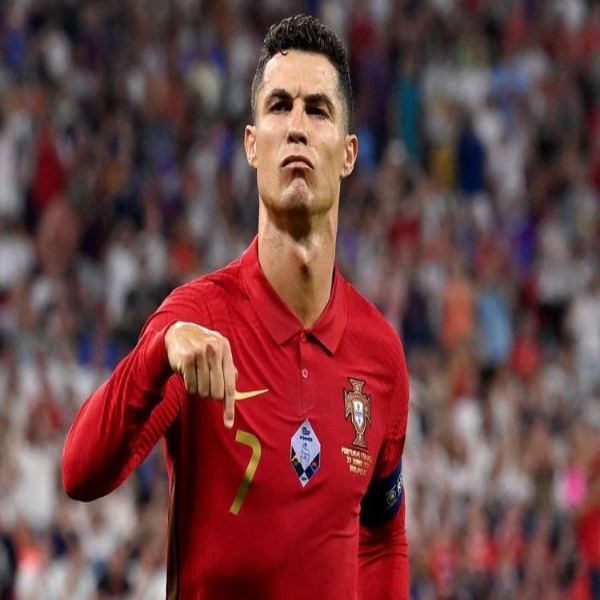

Cartoon Effect Image:


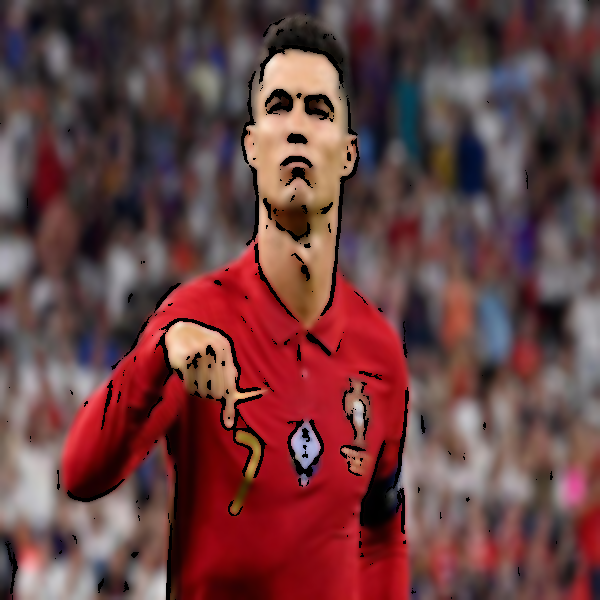

In [2]:
# Step 1: Install OpenCV (if not already installed)
!pip install opencv-python

# Step 2: Import Libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import Image, display

# Step 3: Upload Image
uploaded = files.upload()

# Get filename
filename = list(uploaded.keys())[0]

# Step 4: Read the image
img = cv2.imread(filename)

# Resize (optional)
img = cv2.resize(img, (600, 600))

# Step 5: Apply Cartoon Effect

# 1. Convert to Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Apply Median Blur
gray_blur = cv2.medianBlur(gray, 7)

# 3. Detect Edges using Adaptive Thresholding
edges = cv2.adaptiveThreshold(gray_blur, 255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, blockSize=9, C=9)

# 4. Apply Bilateral Filter to remove noise and keep edges sharp
color = cv2.bilateralFilter(img, d=9, sigmaColor=300, sigmaSpace=300)

# 5. Combine edges with the color image
cartoon = cv2.bitwise_and(color, color, mask=edges)

# Step 6: Display the output
print("Original Image:")
cv2_imshow(img)

print("Cartoon Effect Image:")
cv2_imshow(cartoon)